# AI DAM Data Preperation: final duplicate list

1. this notebook is to create final list of duplicate images based on different Similarity Threshold for each class.
2. input file: dam_duplicate_list.csv
this csv file contains list of all image with their ssim_score for 0.80 threshold. however to balance the class distrubution each class is given slight different threshold and final list is prepared with output file as: driver_duplicate_list_ext.csv

duplicate: 1: this attribute indicate whether image is duplicate or not for ssim threshold as 0.80
value: 0 =>no duplicate
        1 => duplicate and parent_img contains it's duplicate object

output file: dam_duplicate_list_ext.csv
duplicate_final: this attribute is created after readjusting the threshold for each class. 
value: 0 =>no duplicate
       1 => duplicate and parent_img contains it's duplicate object


In [1]:
# import all necessary packages
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import time
import os
#from tqdm import tqdm # for progress indication

**Read the images and generate the train and test dataset**

In [2]:
class_list =  ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
class_desc = ['safe driving', 'texting-right', 'talking on the phone-right', 'texting-left', 'talking on the phone-left', 
              'operating the radio', 'rinking', 'reaching behind', 'hair and makeup', 'talking to passenger']
pd.DataFrame({'class': class_list, 'description': class_desc})

,class,description
0,c0,safe driving
1,c1,texting-right
2,c2,talking on the phone-right
3,c3,texting-left
4,c4,talking on the phone-left
5,c5,operating the radio
6,c6,rinking
7,c7,reaching behind
8,c8,hair and makeup
9,c9,talking to passenger


In [5]:
df_data = pd.read_csv("dam_duplicate_list.csv")
print("Shape: ", df_data.shape)
df_data.head(2)

Shape:  (22424, 7)


,SNo,subject,classname,img,duplicate,parent_img,ssim_score
0,0,p002,c0,img_44733.jpg,0,NaN,0.000000
1,1,p002,c0,img_72999.jpg,1,img_44733.jpg,0.856947


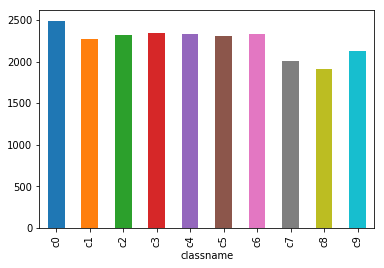

In [6]:
#plotting how the classes are distributed
df_data.groupby(df_data["classname"]).count()["img"].plot(kind="bar")

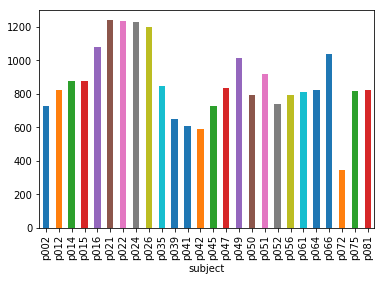

In [7]:
#plotting how the drivers are distributed across dataset
df_data.groupby(df_data["subject"]).count()["img"].plot(kind="bar")

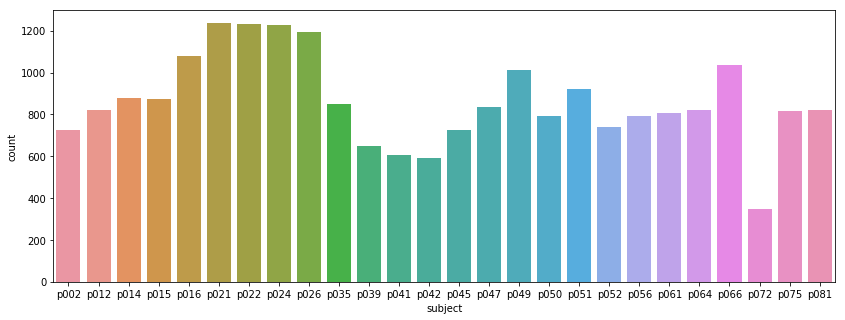

In [8]:
# plotting how the drivers are distributed across dataset
fig, axs = plt.subplots(1,1,figsize=(14,5))
sns.countplot(df_data["subject"], ax = axs)

In [9]:
driver_list = df_data["subject"].unique()
class_id_list = df_data["classname"].unique()
print("Number of unique drivers: ", len(driver_list))
print("Number of class: ", len(class_id_list))

Number of unique drivers:  26
Number of class:  10


In [10]:
df_data["classname"].value_counts()

c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
Name: classname, dtype: int64

In [11]:
df_data["subject"].value_counts()

p021    1237
p022    1233
p024    1226
p026    1196
p016    1078
p066    1034
p049    1011
p051     920
p014     876
p015     875
p035     848
p047     835
p012     823
p081     823
p064     820
p075     814
p061     809
p056     794
p050     790
p052     740
p002     725
p045     724
p039     651
p041     605
p042     591
p072     346
Name: subject, dtype: int64

In [12]:
## CrossTable: drivers and class distibution
df_ct_class_driver = pd.crosstab(df_data["classname"], df_data["subject"],margins =True).T
df_ct_class_driver

classname,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,All
subject,,,,,,,,,,,
p002,76,74,86,79,84,76,83,72,44,51,725
p012,84,95,91,89,97,96,75,72,62,62,823
p014,100,103,100,100,103,102,101,77,38,52,876
p015,79,85,88,94,101,101,99,81,86,61,875
p016,111,102,101,128,104,104,108,101,99,120,1078
p021,135,131,127,128,132,130,126,98,99,131,1237
p022,129,129,128,129,130,130,131,98,98,131,1233
p024,130,129,128,130,129,131,129,101,99,120,1226
p026,130,129,130,131,126,130,128,97,97,98,1196


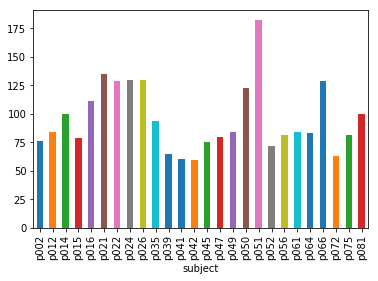

In [13]:
# visualize how drivers are distirbuted witin a class
classname = "c0"
df_ct_class_driver[classname][:-1].plot(kind="bar")

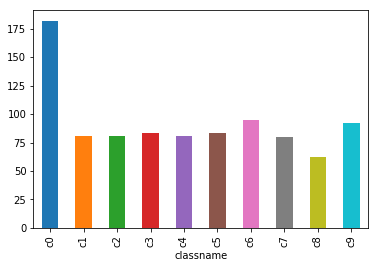

In [14]:
# visualize how particular driver is distirbuted across classes
driverid = "p051"
df_ct_class_driver.T[driverid][:-1].plot(kind="bar")

In [15]:
# get number of unique driver representing each classes
for c in class_id_list:
    cnt = df_data[df_data["classname"] == c]["subject"].unique().shape[0] 
    print("Number of unique drivers in class {}: {}".format(c, cnt))

Number of unique drivers in class c0: 26
Number of unique drivers in class c1: 26
Number of unique drivers in class c2: 26
Number of unique drivers in class c3: 26
Number of unique drivers in class c4: 26
Number of unique drivers in class c5: 26
Number of unique drivers in class c6: 26
Number of unique drivers in class c7: 26
Number of unique drivers in class c8: 26
Number of unique drivers in class c9: 26


In [16]:
# get minimum and maxmimum of driver's samples in class across dataset
CNT_PER_DRIVER_LIST = []
for c in class_id_list:
    for d in driver_list:
        cnt = df_data[(df_data["classname"] == c) & (df_data["subject"] == d)].shape[0]     
        CNT_PER_DRIVER_LIST.append(cnt)
        
MAX_NUM_IMGS_PER_DRIVER = np.max(CNT_PER_DRIVER_LIST)
MIN_NUM_IMGS_PER_DRIVER = np.min(CNT_PER_DRIVER_LIST)
print("MIN_NUM_IMGS_PER_DRIVER: ", MIN_NUM_IMGS_PER_DRIVER)
print("MAX_NUM_IMGS_PER_DRIVER: ", MAX_NUM_IMGS_PER_DRIVER)

MIN_NUM_IMGS_PER_DRIVER:  2
MAX_NUM_IMGS_PER_DRIVER:  182


In [17]:
# minimum representation of any driver in class
np.min(df_ct_class_driver[:-1])

classname
c0      59
c1      45
c2      36
c3      31
c4      34
c5       6
c6      35
c7       2
c8      21
c9      51
All    346
dtype: int64

In [18]:
# maximum representation of any driver in class
np.max(df_ct_class_driver[:-1])

classname
c0      182
c1      131
c2      130
c3      131
c4      132
c5      131
c6      131
c7      101
c8      114
c9      131
All    1237
dtype: int64

In [19]:
df_data["duplicate"].value_counts()

0    11621
1    10803
Name: duplicate, dtype: int64

In [20]:
## CrossTable: drivers and class distibution
df_ct_class_dup = pd.crosstab(df_data["classname"], df_data["duplicate"],margins =True).T
df_ct_class_dup

classname,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,All
duplicate,,,,,,,,,,,
0,1051,963,854,863,1147,1336,1251,1635,1471,1050,11621
1,1438,1304,1463,1483,1179,976,1074,367,440,1079,10803
All,2489,2267,2317,2346,2326,2312,2325,2002,1911,2129,22424


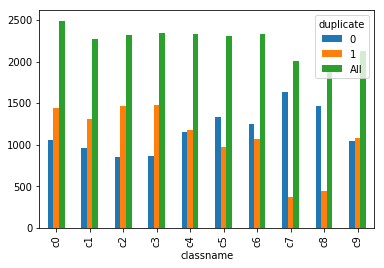

In [21]:
#plotting how the duplicate images based on ssim score exsit among each classes
df_ct_class_dup.T[:-1].plot(kind="bar")

In [22]:
df_data.shape

(22424, 7)

In [23]:
df_data_final = df_data.copy()
df_data_final['duplicate_final'] = df_data_final['duplicate']
df_data_final.shape

(22424, 8)

***balancing data***

In [24]:
thresh1 = 0.82
thresh2 = 0.815
thresh3 = 0.81
thresh4 = 0.805
colnames1 = ["c0", "c1", "c2", "c3", "c9"]
colnames2 = ["c4"]
colnames3 = ["c5", "c6"]
colnames4 = ["c8"]
df_data_final.loc[df_data_final["classname"].isin(colnames1) & (df_data_final['ssim_score'] <= thresh1), "duplicate_final"] = 0
df_data_final.loc[df_data_final["classname"].isin(colnames2) & (df_data_final['ssim_score'] <= thresh2), "duplicate_final"] = 0
df_data_final.loc[df_data_final["classname"].isin(colnames3) & (df_data_final['ssim_score'] <= thresh3), "duplicate_final"] = 0
df_data_final.loc[df_data_final["classname"].isin(colnames4) & (df_data_final['ssim_score'] <= thresh4), "duplicate_final"] = 0

In [25]:
df_data_final['duplicate'].value_counts()

0    11621
1    10803
Name: duplicate, dtype: int64

In [26]:
df_data_final['duplicate_final'].value_counts()

0    15855
1     6569
Name: duplicate_final, dtype: int64

In [27]:
## CrossTable: drivers and class distibution
df_ct_class_dup_final = pd.crosstab(df_data_final["classname"], df_data_final["duplicate_final"],margins =True).T
df_ct_class_dup_final

classname,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,All
duplicate_final,,,,,,,,,,,
0,1550,1567,1584,1585,1640,1643,1562,1635,1563,1526,15855
1,939,700,733,761,686,669,763,367,348,603,6569
All,2489,2267,2317,2346,2326,2312,2325,2002,1911,2129,22424


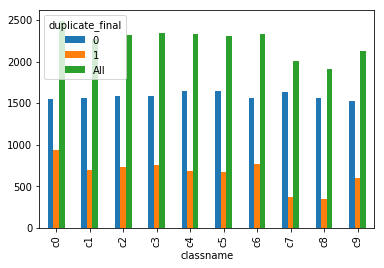

In [28]:
#plotting how the duplicate images based on ssim score exsit among each classes
df_ct_class_dup_final.T[:-1].plot(kind="bar")

In [30]:
df_data_final.to_csv("dam_duplicate_list_ext.csv")